<a href="https://colab.research.google.com/github/edmilsonsgjk/stock_prediction/blob/master/stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install yfinance --upgrade --no-cache-dir


In [0]:
# Import packets
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import yfinance as yf #instal via pip install yfinance --upgrade --no-cache-dir

#import models
import sklearn
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor

In [276]:
# download stock price dataset we want to predict
stock_name = 'BBAS3.SA'
df = pd.stock = yf.download(stock_name, start="2017-01-01", end="2019-09-06").reset_index()
df.head()

[*********************100%***********************]  1 of 1 downloaded


,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-02,27.90,27.96,27.44,27.54,24.82,1968200
1,2017-01-03,27.76,28.80,27.76,28.80,25.95,7578900
2,2017-01-04,28.65,29.00,28.55,28.65,25.82,4156300
3,2017-01-05,28.72,28.90,28.43,28.58,25.75,5457100
4,2017-01-06,28.58,28.93,28.54,28.89,26.03,3692400


In [277]:
df.to_csv('/BBAS3.csv', index = False)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-02,27.90,27.96,27.44,27.54,24.82,1968200
1,2017-01-03,27.76,28.80,27.76,28.80,25.95,7578900
2,2017-01-04,28.65,29.00,28.55,28.65,25.82,4156300
3,2017-01-05,28.72,28.90,28.43,28.58,25.75,5457100
4,2017-01-06,28.58,28.93,28.54,28.89,26.03,3692400


In [0]:
df.set_index('Date', inplace=True)

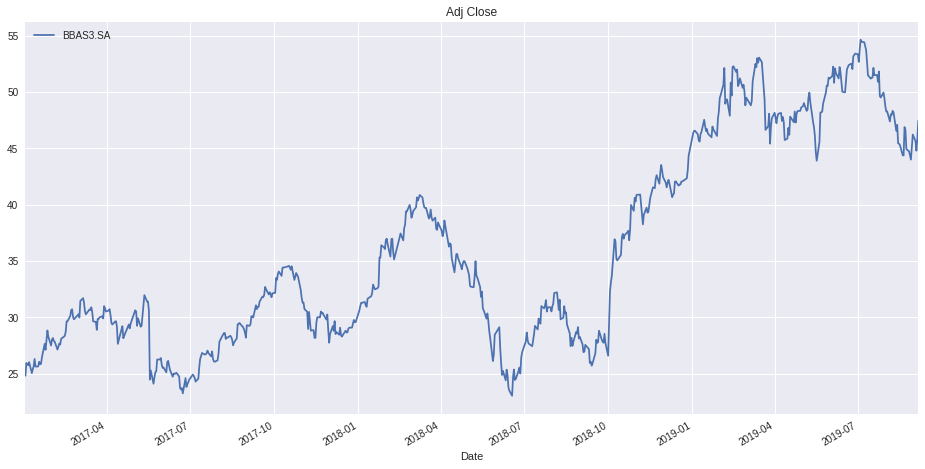

In [279]:
plt.style.use('seaborn')
df_raw = df[df.columns[-2]]
df_raw.plot(label=stock_name, figsize=(16,8), title=df.columns[-2], legend=True)


code out the Rolling Mean:

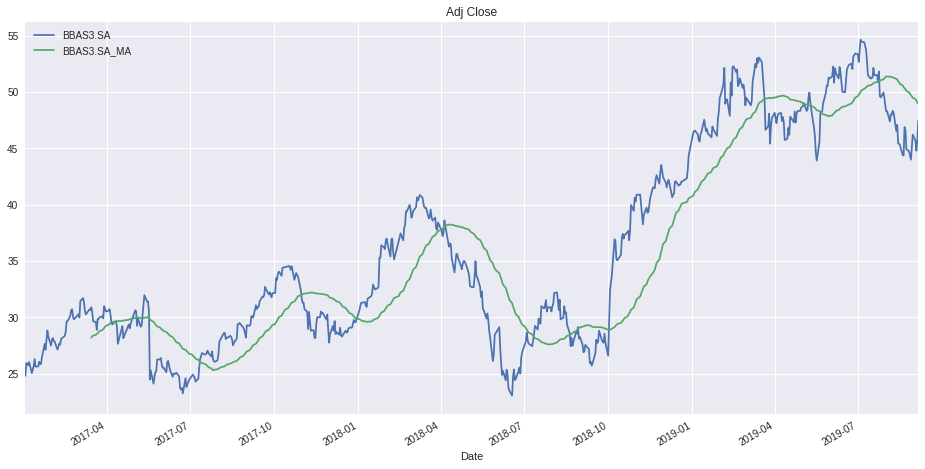

In [280]:
window = 50
df_MA = df[df.columns[-2]].rolling(window).mean()
df_raw.plot(label=stock_name, figsize=(16,8), title=df.columns[-2], grid=True, legend=True)
df_MA.plot(label=stock_name+'_MA', figsize=(16,8), title=df.columns[-2], grid=True, legend=True)

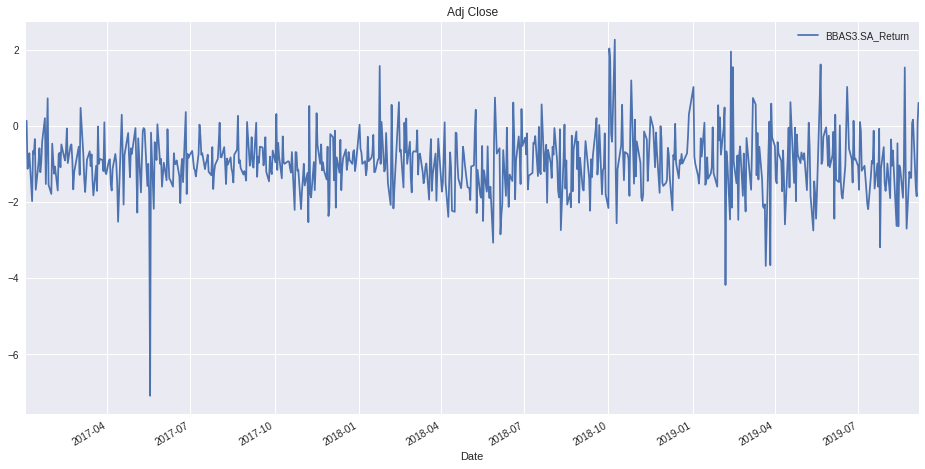

In [282]:
df_ret = df[df.columns[-2]] - df[df.columns[-2]].shift(1) - 1
df_ret.plot(label=stock_name+'_Return', figsize=(16,8), title=df.columns[-2], grid=True, legend=True)

Using scikit-learn packages
Here we use scikit-learn packages to train our regression models, including models like:

*   Linear regression
*   Ridge regression
*   Lasso
*   KNN regression




In [0]:
# train/test split
df.fillna(value=-99999, inplace=True)

X = df.iloc[:,:-1].to_numpy() 
y = df.iloc[:,-1].to_numpy() 

num_data = df.shape[0]
split_ratio = 0.8
ind_split = int(split_ratio * num_data)

X_train = X[:ind_split]
y_train = y[:ind_split].reshape(-1,1)
X_test = X[ind_split:]
y_test = y[ind_split:].reshape(-1,1)

split_time = df.index[ind_split]

Training RMSE is: 3877485.090025
Testing RMSE is: 5913837.229739


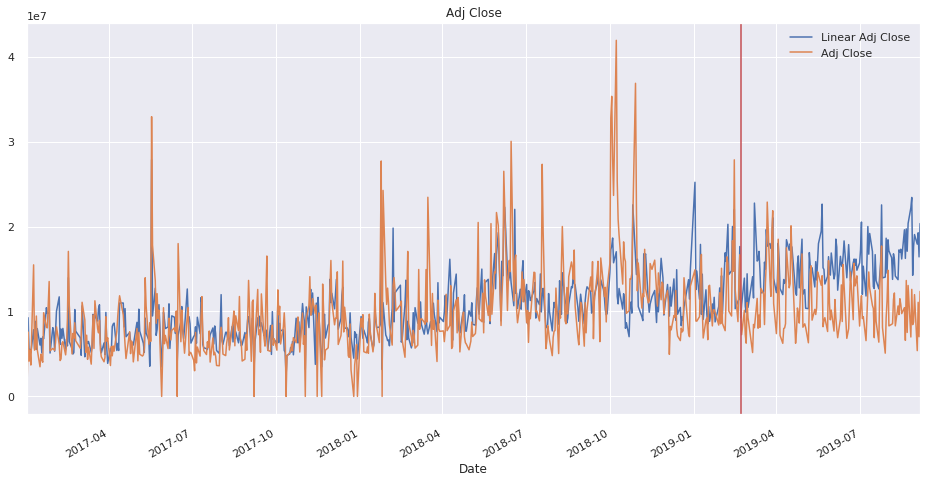

In [288]:

# build Linear regression model
# training
reg_linear = LinearRegression()
reg_linear.fit(X_train, y_train)

# testing
trainings = reg_linear.predict(X_train).reshape(-1,1)
predictions = reg_linear.predict(X_test).reshape(-1,1)

# combine all predictions
all_pred = np.concatenate((trainings, predictions), axis=0)

# transform to dataframe for plotting
df_linear = pd.DataFrame(all_pred, columns=['Linear '+df.columns[-2]], index=df.index)
df_linear[df.columns[-2]] = y

# plot results and add train/test split timing line
df_linear.plot(label=stock_name+'_Linear', figsize=(16,8), title=df.columns[-2], grid=True, legend=True)
plt.axvline(pd.Timestamp(split_time),color='r')

# calculate RMSE using vectorization
train_rmse = np.sqrt(1/X_train.shape[0]*np.squeeze(np.dot((trainings - y_train).T, (trainings - y_train))))
test_rmse = np.sqrt(1/X_test.shape[0]*np.squeeze(np.dot((predictions - y_test).T, (predictions - y_test))))

print("Training RMSE is: %f" % train_rmse)
print("Testing RMSE is: %f" % test_rmse)

df_rmse = pd.DataFrame([train_rmse, test_rmse], columns=['Linear'], index=['training', 'testing'])

Training RMSE is: 3877553.057325
Testing RMSE is: 5904155.476983


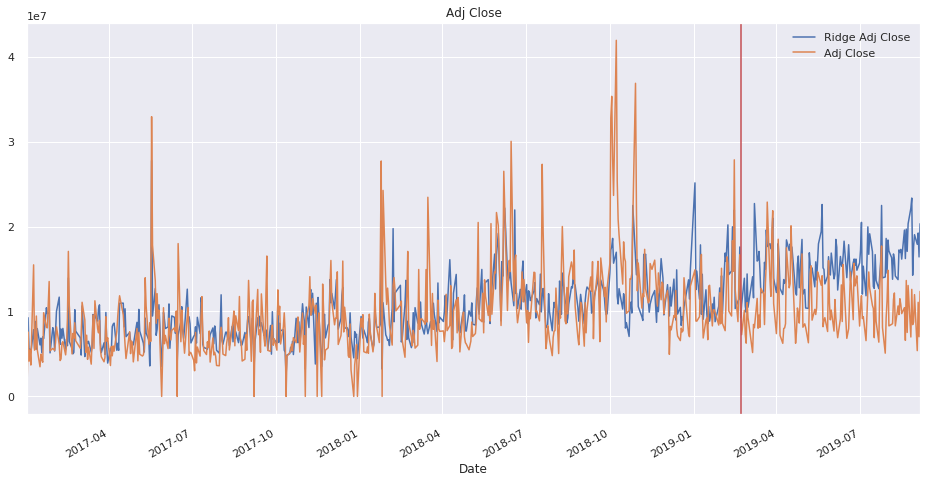

In [273]:
# build Ridge regression model
# training
reg_ridge = Ridge(alpha=.5)
reg_ridge.fit(X_train, y_train)

# testing
trainings = reg_ridge.predict(X_train).reshape(-1,1)
predictions = reg_ridge.predict(X_test).reshape(-1,1)

# combine all predictions
all_pred = np.concatenate((trainings, predictions), axis=0)

# transform to dataframe for plotting
df_ridge = pd.DataFrame(all_pred, columns=['Ridge '+df.columns[-2]], index=df.index)
df_ridge[df.columns[-2]] = y

# plot results and add train/test split timing line
df_ridge.plot(label=stock_name+'_Ridge', figsize=(16,8), title=df.columns[-2], grid=True, legend=True)
plt.axvline(pd.Timestamp(split_time),color='r')

# calculate RMSE using vectorization
train_rmse = np.sqrt(1/X_train.shape[0]*np.squeeze(np.dot((trainings - y_train).T, (trainings - y_train))))
test_rmse = np.sqrt(1/X_test.shape[0]*np.squeeze(np.dot((predictions - y_test).T, (predictions - y_test))))

print("Training RMSE is: %f" % train_rmse)
print("Testing RMSE is: %f" % test_rmse)

df_rmse['Ridge'] = [train_rmse, test_rmse]

Training RMSE is: 3756241.939358
Testing RMSE is: 3795443.875949


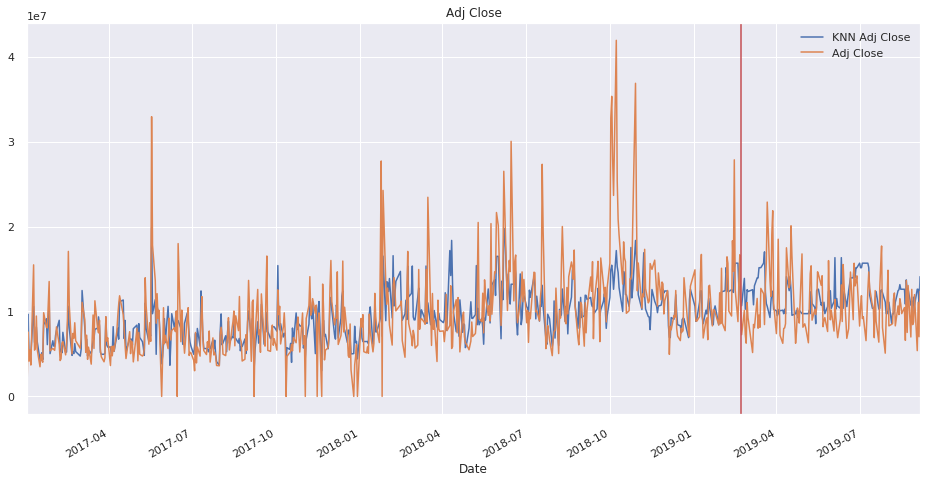

In [295]:
# build KNN regression model
# training
reg_knn = KNeighborsRegressor(n_neighbors=4)
reg_knn.fit(X_train, y_train)

# testing
trainings = reg_knn.predict(X_train).reshape(-1,1)
predictions = reg_knn.predict(X_test).reshape(-1,1)

# combine all predictions
all_pred = np.concatenate((trainings, predictions), axis=0)

# transform to dataframe for plotting
df_knn = pd.DataFrame(all_pred, columns=['KNN '+df.columns[-2]], index=df.index)
df_knn[df.columns[-2]] = y

# plot results and add train/test split timing line
df_knn.plot(label=stock_name+'_KNN', figsize=(16,8), title=df.columns[-2], grid=True, legend=True)
plt.axvline(pd.Timestamp(split_time),color='r')

# calculate RMSE using vectorization
train_rmse = np.sqrt(1/X_train.shape[0]*np.squeeze(np.dot((trainings - y_train).T, (trainings - y_train))))
test_rmse = np.sqrt(1/X_test.shape[0]*np.squeeze(np.dot((predictions - y_test).T, (predictions - y_test))))

print("Training RMSE is: %f" % train_rmse)
print("Testing RMSE is: %f" % test_rmse)

df_rmse['KNN'] = [train_rmse, test_rmse]

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4084407243235844.5, tolerance: 1474310626319.6936
  positive)


Training RMSE is: 3907537.584463
Testing RMSE is: 6002298.926331


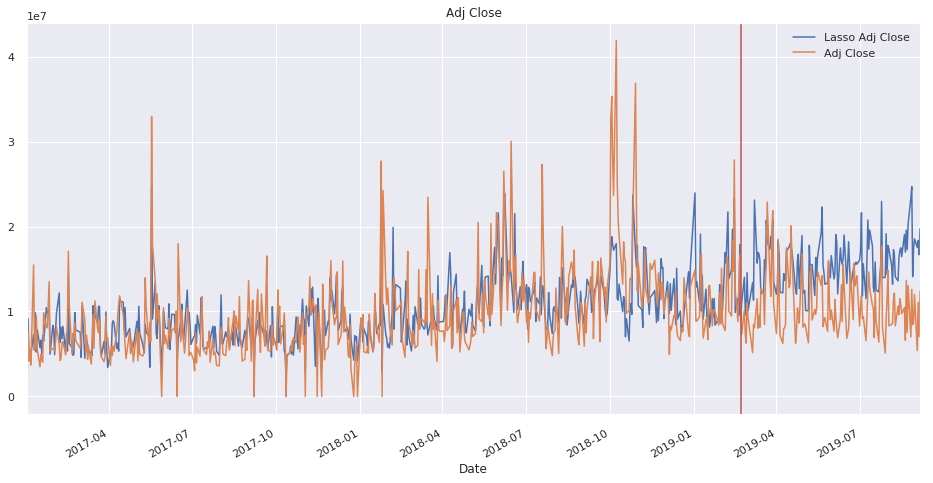

In [293]:
# build Lasso regression model
# training
reg_lasso = Lasso(alpha=0.1)
reg_lasso.fit(X_train, y_train)

# testing
trainings = reg_lasso.predict(X_train).reshape(-1,1)
predictions = reg_lasso.predict(X_test).reshape(-1,1)

# combine all predictions
all_pred = np.concatenate((trainings, predictions), axis=0)

# transform to dataframe for plotting
df_lasso = pd.DataFrame(all_pred, columns=['Lasso '+df.columns[-2]], index=df.index)
df_lasso[df.columns[-2]] = y

# plot results and add train/test split timing line
df_lasso.plot(label=stock_name+'_Lasso', figsize=(16,8), title=df.columns[-2], grid=True, legend=True)
plt.axvline(pd.Timestamp(split_time),color='r')

# calculate RMSE using vectorization
train_rmse = np.sqrt(1/X_train.shape[0]*np.squeeze(np.dot((trainings - y_train).T, (trainings - y_train))))
test_rmse = np.sqrt(1/X_test.shape[0]*np.squeeze(np.dot((predictions - y_test).T, (predictions - y_test))))

print("Training RMSE is: %f" % train_rmse)
print("Testing RMSE is: %f" % test_rmse)

df_rmse['Lasso'] = [train_rmse, test_rmse]

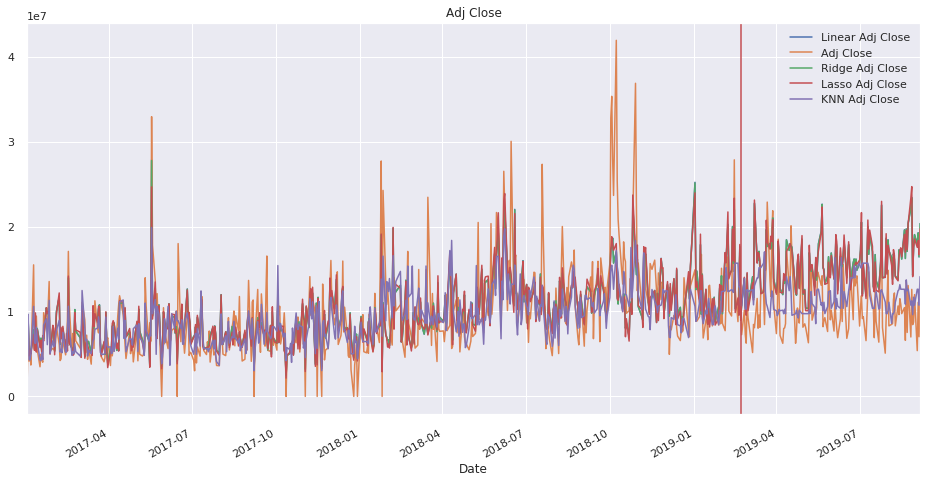

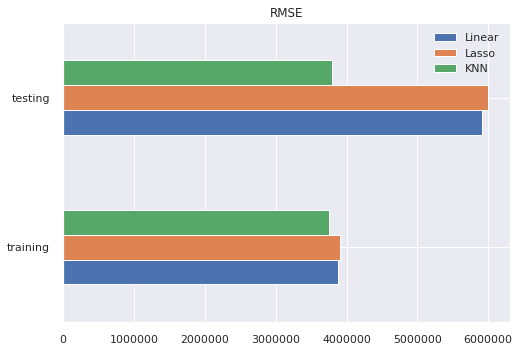

In [296]:
# visualize all models in one plot
df_all = df_linear
df_all[df_ridge.columns[0]] = df_ridge[df_ridge.columns[0]]
df_all[df_lasso.columns[0]] = df_lasso[df_lasso.columns[0]]
df_all[df_knn.columns[0]] = df_knn[df_knn.columns[0]]

# plot results and add train/test split timing line
df_all.plot(label=stock_name, figsize=(16,8), title=df.columns[-2], grid=True, legend=True)
plt.axvline(pd.Timestamp(split_time),color='r')

df_rmse.plot(kind='barh', title='RMSE')